In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


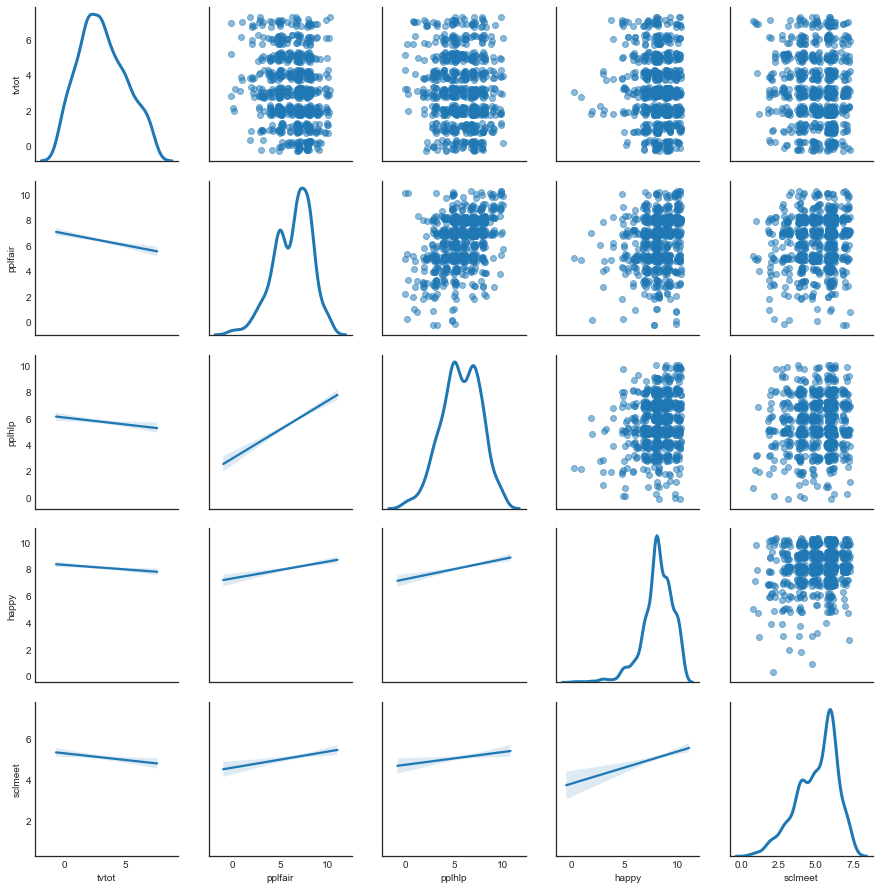

In [7]:
#make scatterplot matrix
sns.set_style('white')

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

#take a subset of the data to make plots clearer
df_czch = df.loc[
    ((df['cntry']=='CZ') | (df['cntry']=='CH')) & (df['year']==6),
    ['cntry', 'tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

#because variables can only take integer values between 0 and 10, points on the plot will hide one another
#to better see all the points, create a dataframe of random noise (jitter) and add it only when plotting

#make a copy of the data to add jitter to and plot
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
#make random noise
jitter = pd.DataFrame(np.random.uniform(-.3,.3, size=(df_jittered.shape)),
                     columns=df_jittered.columns)

#combine the data and the noise
df_jittered = df_jittered.add(jitter)

#make a scatterplot matrix
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
#scatterplot
g.map_upper(plt.scatter, alpha=.5)
#fit line summarizing the linear relationship of the two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
#give information about the univariate distributions of the variables
g.map_diag(sns.kdeplot, lw=3)

plt.show()